In [1]:
#Importing Dependencies
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, MaxPooling2D, Flatten, Conv2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

2024-02-21 13:13:08.010868: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-21 13:13:08.010972: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-21 13:13:08.301741: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
#Data Preprocessing

#1_Creating test dataframe

data_dir_test = '/kaggle/input/melanoma-cancer-dataset/test'    #Test Directory address
sets_test = os.listdir(data_dir_test) #Benign and Malignant in a list
file_paths = [] 
labels=[]

#Looping through the folders
for folder in sets_test:
    sub_fold_path = os.path.join(data_dir_test, folder)   #creates paths to malignant and benign folder
    sub_fold = os.listdir(sub_fold_path) #lists paths of images 
    for img in sub_fold:
        image_path = os.path.join(sub_fold_path, img)
        file_paths.append(image_path)
        labels.append(folder)


f_series = pd.Series(file_paths, name = 'file_paths')
l_series = pd.Series(labels, name = 'labels')
test_unshuffled_df = pd.concat([f_series, l_series], axis =1)
test_df = test_unshuffled_df.sample(frac=1).reset_index(drop=True)  #Shuffling the test set

In [3]:
test_df

,file_paths,labels
0,/kaggle/input/melanoma-cancer-dataset/test/Mal...,Malignant
1,/kaggle/input/melanoma-cancer-dataset/test/Ben...,Benign
2,/kaggle/input/melanoma-cancer-dataset/test/Mal...,Malignant
3,/kaggle/input/melanoma-cancer-dataset/test/Ben...,Benign
4,/kaggle/input/melanoma-cancer-dataset/test/Ben...,Benign
...,...,...
1995,/kaggle/input/melanoma-cancer-dataset/test/Mal...,Malignant
1996,/kaggle/input/melanoma-cancer-dataset/test/Mal...,Malignant
1997,/kaggle/input/melanoma-cancer-dataset/test/Ben...,Benign
1998,/kaggle/input/melanoma-cancer-dataset/test/Mal...,Malignant


In [4]:
#2_Creating train dataframe

data_dir_train = '/kaggle/input/melanoma-cancer-dataset/train'    #Train Directory address
sets_train = os.listdir(data_dir_train) 
file_paths = [] 
labels =[]

#Looping through the folders
for folder in sets_train:
    sub_fold_path = os.path.join(data_dir_train, folder)   
    sub_fold = os.listdir(sub_fold_path) 
    for img in sub_fold:
        image_path = os.path.join(sub_fold_path, img)
        file_paths.append(image_path)
        labels.append(folder)

i_series = pd.Series(file_paths, name = 'file_paths')
l_series = pd.Series(labels, name = 'labels')
train_full_df = pd.concat([i_series, l_series], axis =1)

In [5]:
train_full_df

,file_paths,labels
0,/kaggle/input/melanoma-cancer-dataset/train/Be...,Benign
1,/kaggle/input/melanoma-cancer-dataset/train/Be...,Benign
2,/kaggle/input/melanoma-cancer-dataset/train/Be...,Benign
3,/kaggle/input/melanoma-cancer-dataset/train/Be...,Benign
4,/kaggle/input/melanoma-cancer-dataset/train/Be...,Benign
...,...,...
11874,/kaggle/input/melanoma-cancer-dataset/train/Ma...,Malignant
11875,/kaggle/input/melanoma-cancer-dataset/train/Ma...,Malignant
11876,/kaggle/input/melanoma-cancer-dataset/train/Ma...,Malignant
11877,/kaggle/input/melanoma-cancer-dataset/train/Ma...,Malignant


In [6]:
#splitting train_full_df into training and validation dataframes

train_df, valid_df = train_test_split(train_full_df, test_size = 0.1, random_state =10, 
stratify = train_full_df['labels'])  #stratify will take care of shuffling

In [7]:
print(f'Training Dataframe\n {train_df}\n\n')
print(f'Validation Dataframe\n {valid_df}\n\n')
print(f'Testing Dataframe\n {test_df}')

Training Dataframe
                                               file_paths     labels
11861  /kaggle/input/melanoma-cancer-dataset/train/Ma...  Malignant
8133   /kaggle/input/melanoma-cancer-dataset/train/Ma...  Malignant
8238   /kaggle/input/melanoma-cancer-dataset/train/Ma...  Malignant
3149   /kaggle/input/melanoma-cancer-dataset/train/Be...     Benign
5042   /kaggle/input/melanoma-cancer-dataset/train/Be...     Benign
...                                                  ...        ...
5765   /kaggle/input/melanoma-cancer-dataset/train/Be...     Benign
6441   /kaggle/input/melanoma-cancer-dataset/train/Ma...  Malignant
2743   /kaggle/input/melanoma-cancer-dataset/train/Be...     Benign
3971   /kaggle/input/melanoma-cancer-dataset/train/Be...     Benign
1972   /kaggle/input/melanoma-cancer-dataset/train/Be...     Benign

[10691 rows x 2 columns]


Validation Dataframe
                                               file_paths     labels
6049   /kaggle/input/melanoma-cancer-dataset/t

In [8]:
#Converting the dataframes into tensors that will be fed to the neural network
batch_size = 64
image_size = (176,176)
gen = ImageDataGenerator(rescale=1.0/255)
#normalization not neccessary but it helps a little with efficacy in gradient descent
train_gen = gen.flow_from_dataframe(train_df, x_col='file_paths', y_col='labels', target_size= image_size, 
                                   class_mode= 'binary', color_mode='rgb', shuffle = True,
                                   batch_size = batch_size)  
valid_gen = gen.flow_from_dataframe(valid_df, x_col='file_paths', y_col='labels', target_size= image_size, 
                                   class_mode= 'binary', color_mode='rgb', shuffle = True,
                                   batch_size= batch_size)
test_gen = gen.flow_from_dataframe(test_df, x_col='file_paths', y_col='labels', target_size= image_size, 
                                   class_mode= 'binary', color_mode='rgb', shuffle = False,
                                   batch_size= batch_size)

Found 10691 validated image filenames belonging to 2 classes.
Found 1188 validated image filenames belonging to 2 classes.
Found 2000 validated image filenames belonging to 2 classes.


In [9]:
#Building the model
model = Sequential()

# Add convolutional layers

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(176, 176, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
# Flatten the output of the convolutional layers
model.add(Flatten())

# Add dense layers
model.add(Dense(16, activation='relu'))
# Output layer
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(0.0006),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 174, 174, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 87, 87, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 85, 85, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 42, 42, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 40, 40, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 20, 20, 128)       0

In [10]:
history = model.fit(train_gen, validation_data = valid_gen, epochs = 30)

Epoch 1/30


I0000 00:00:1708521236.452224     101 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


168/168 [==============================] - 91s 498ms/step - loss: 0.4847 - accuracy: 0.7548 - val_loss: 0.3581 - val_accuracy: 0.8367
Epoch 2/30
168/168 [==============================] - 28s 162ms/step - loss: 0.3872 - accuracy: 0.8279 - val_loss: 0.3586 - val_accuracy: 0.8451
Epoch 3/30
168/168 [==============================] - 28s 168ms/step - loss: 0.3461 - accuracy: 0.8471 - val_loss: 0.3408 - val_accuracy: 0.8468
Epoch 4/30
168/168 [==============================] - 27s 162ms/step - loss: 0.3255 - accuracy: 0.8566 - val_loss: 0.3071 - val_accuracy: 0.8712
Epoch 5/30
168/168 [==============================] - 27s 159ms/step - loss: 0.3144 - accuracy: 0.8613 - val_loss: 0.3028 - val_accuracy: 0.8687
Epoch 6/30
168/168 [==============================] - 27s 160ms/step - loss: 0.3153 - accuracy: 0.8617 - val_loss: 0.2947 - val_accuracy: 0.8737
Epoch 7/30
168/168 [==============================] - 30s 177ms/step - loss: 0.2898 - accuracy: 0.8724 - val_loss: 0.3114 - val_accuracy: 0.8

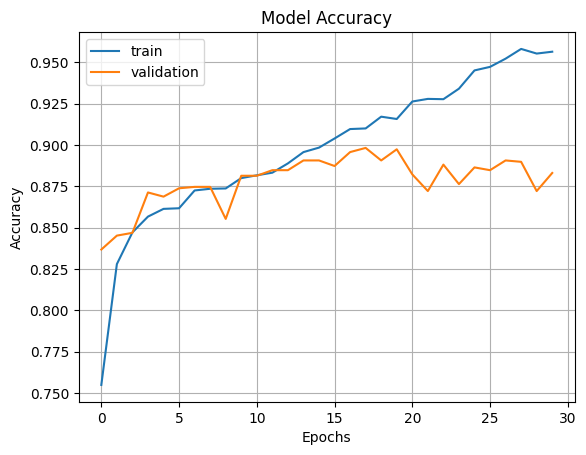

In [11]:
#Printing Accuracy
fig1 =plt.gcf()  
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','validation'])
plt.show()

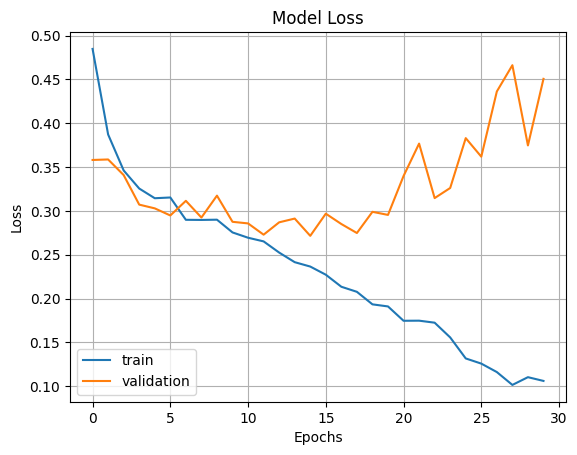

In [12]:
#Printing Loss
fig1 =plt.gcf()  #get current figure
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train','validation'])
plt.show()

In [13]:
#Evaluating the model
test_evaluation = model.evaluate(test_gen)
print(test_evaluation)

32/32 [==============================] - 17s 531ms/step - loss: 0.2961 - accuracy: 0.9150
[0.2960945665836334, 0.9150000214576721]
